## Title: Seed Count-data analysis of groundtruth data and SAM-generated feature extraction data
##### Author: Harpreet Kaur Bargota
##### Email: harpreet.bargota@agr.gc.ca
##### Date: March 27, 2025

In [1]:
# import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')


In [2]:
# read the .csv file containing the seed count data 
seed2=pd.read_excel(r"C:\Users\bargotah\Downloads\FEpipeline_Scripts\FEpipeline_Results_March\ouput_FE_SAM2.1\Seed Count.xlsx")
seed1=pd.read_excel(r"C:\Users\bargotah\Downloads\FEpipeline_Scripts\FEpipeline_Results_March\output_FE_SAM1.0\Seed Count.xlsx")


In [3]:
# check the dataset
print (seed1.head(4))
print (seed2.head(4))

                    Class  Seed Count
0  Faba-Seed-CC_Vf196-1-2          11
1  Faba-Seed-CC_Vf127-1-2          11
2  Faba-Seed-CC_Vf309-3-1          10
3  Faba-Seed-CC_Vf308-1-1          10
                    Class  Seed Count
0  Faba-Seed-CC_Vf196-1-2          11
1  Faba-Seed-CC_Vf127-1-2          11
2  Faba-Seed-CC_Vf299-3-1          10
3  Faba-Seed-CC_Vf295-1-1          10


In [4]:
#check teh data
print (seed1.info())
print (seed2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Class       554 non-null    object
 1   Seed Count  554 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Class       554 non-null    object
 1   Seed Count  554 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.8+ KB
None


In [5]:
#check for descriptive summary of data
print (seed1.describe())
print (seed2.describe())

       Seed Count
count  554.000000
mean     7.648014
std      2.705016
min      1.000000
25%      5.000000
50%      9.000000
75%     10.000000
max     11.000000
       Seed Count
count  554.000000
mean     7.642599
std      2.701963
min      1.000000
25%      5.000000
50%      9.000000
75%     10.000000
max     11.000000


In [6]:
# check if the index is the same for both SAM1.0 and SAM2.1
seed1.index.equals(seed2.index)


True

## Comparison of seed count of groundtruth data with SAM2.1

In [7]:
# read the groundtruth data (Aug data) provided by Dr. Nicholas Larkan 
Aug_data = pd.read_excel("C:/Users/bargotah/Downloads/Python Scripts/Faba Seed Analyzer Data August 2024-103.xlsx", sheet_name="Mean S2 Seed Data")
Aug_data.head(5)

,ID,Main Seed,Main Seeds,Weight(g),TGW(g),Seeds/kg,"""B-Stocking""/Non-Seeds",Date,Time,ØArea,...,Max Width,Max Length,Volume(ml),Volume Weight(kg/hl),ØCircularity,Min Circularity,Max Circularity,ØL/W Ratio,Min L/W Ratio,Max L/W Ratio
0,Vf1-1-2,Vicia faba,4,4.8877,1221.925000,818.380834,8,13/06/2023,14:38,219.500247,...,14.532204,21.097440,15,32.584667,1.168153,1.162423,1.173740,1.368314,1.291562,1.451772
1,Vf4-1-1,Vicia faba,6,1.9316,321.933333,3106.233175,7,13/06/2023,14:40,54.012175,...,8.224431,10.592581,15,12.877333,1.145160,1.126615,1.155499,1.238091,1.169780,1.294690
2,Vf7-1-1,Vicia faba,10,3.5681,356.810000,2802.612034,9,13/06/2023,14:42,65.235907,...,8.462456,11.367768,15,23.787333,1.164687,1.135995,1.187734,1.351447,1.251236,1.429181
3,Vf8-1-1,Vicia faba,9,3.8984,433.155556,2308.639442,9,13/06/2023,14:43,70.955747,...,9.208415,12.489041,15,25.989333,1.161806,1.151720,1.179324,1.317772,1.249530,1.399287
4,Vf9-1-1,Vicia faba,10,4.5645,456.450000,2190.820462,11,13/06/2023,14:45,77.492095,...,9.354255,13.390670,15,30.430000,1.194822,1.167892,1.263545,1.460535,1.374786,1.620578


#### The groundtruth Aug datasheet contains the columns-ID and Main seeds, which gives the information about class ID and number of seeds in images, respectively.

In [8]:
# Extract the df containing only ID, MAin seeds
col_list = ['ID', 'Main Seeds']
Org_Seeds = Aug_data[col_list]
Org_Seeds.head(2)

,ID,Main Seeds
0,Vf1-1-2,4
1,Vf4-1-1,6


#### For uniformity in indices, add the string'Faba-Seed-CC_' before the ID.



In [9]:
# add the string before the string- ID
Org_Seeds['ID'] = 'Faba-Seed-CC_' + Org_Seeds['ID']
Org_Seeds.head(4)

,ID,Main Seeds
0,Faba-Seed-CC_Vf1-1-2,4
1,Faba-Seed-CC_Vf4-1-1,6
2,Faba-Seed-CC_Vf7-1-1,10
3,Faba-Seed-CC_Vf8-1-1,9


#### Join the dfs-seed1 (SAM1 data) and groundtruth data using merge function, which joins both dfs according to the common key "CLass", "ID".

In [10]:
# merge both dfs
merged_df = pd.merge(seed2, Org_Seeds, left_on='Class', right_on='ID', how='inner')
merged_df.head(4)

,Class,Seed Count,ID,Main Seeds
0,Faba-Seed-CC_Vf196-1-2,11,Faba-Seed-CC_Vf196-1-2,11
1,Faba-Seed-CC_Vf127-1-2,11,Faba-Seed-CC_Vf127-1-2,11
2,Faba-Seed-CC_Vf299-3-1,10,Faba-Seed-CC_Vf299-3-1,10
3,Faba-Seed-CC_Vf295-1-1,10,Faba-Seed-CC_Vf295-1-1,10


### Scatterplot and histogram analysis

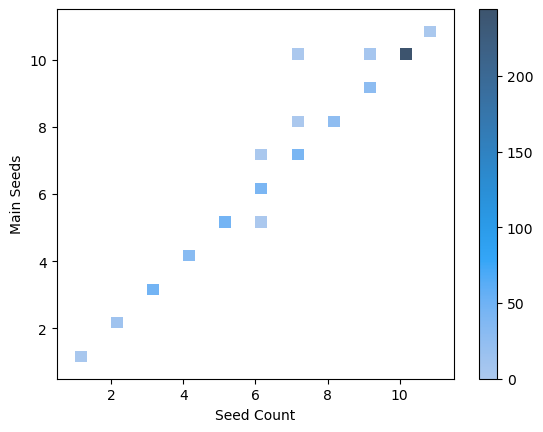

In [11]:
sns.histplot(
    data=merged_df,
    x='Seed Count',
    y='Main Seeds',
    bins=30,
    cbar=True
)
plt.show()

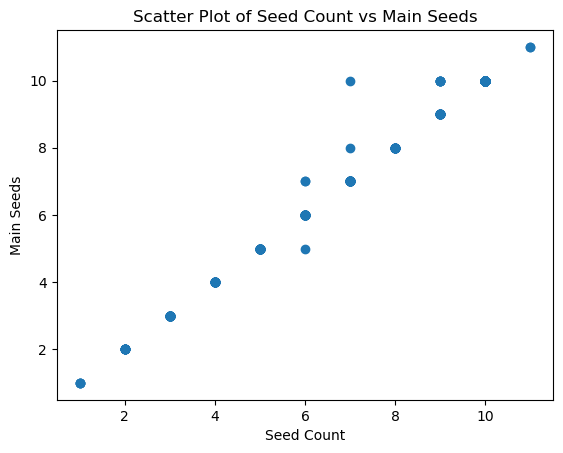

In [12]:
plt.figure()
plt.scatter(merged_df['Seed Count'], merged_df['Main Seeds'])
plt.xlabel('Seed Count')
plt.ylabel('Main Seeds')
plt.title('Scatter Plot of Seed Count vs Main Seeds')
plt.show()

### Scatter plot and Histogram analysis
The 2D histogram displays the relationship between Seed Count (X-axis) and Main Seeds (Y-axis). The color intensity represents the frequency of observations, with darker shades indicating higher counts.

The distribution shows a positive trend where higher seed counts generally correlate with higher main seeds.

The highest density occurs around a Seed Count of 10 and Main Seeds of 10, where the color is darkest, suggesting this combination appears most frequently.

There is a spread across the plot, but the counts are generally higher in the upper-right quadrant, indicating that higher values of both variables are more common.

The color bar on the right shows that the frequency ranges from 0 (light blue) to over 200 (dark blue/black) counts.

The distribution is slightly scattered but generally aligned along the diagonal, implying a direct relationship between Seed Count and Main Seeds.

### Bland-Altman plot analysis

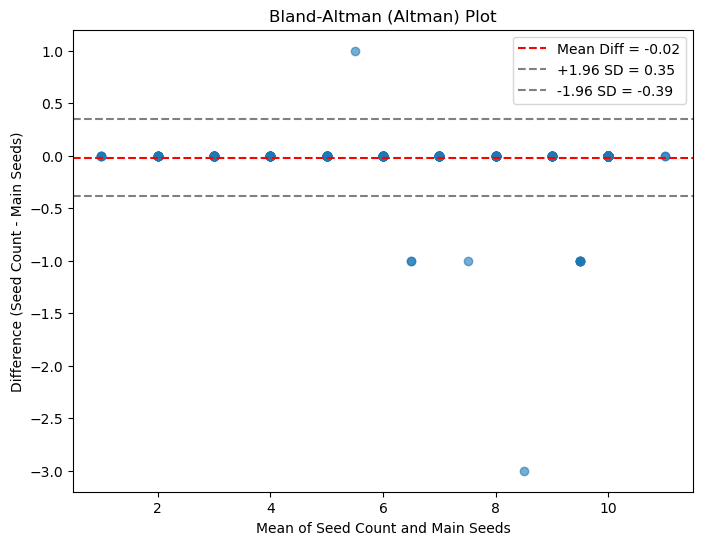

In [13]:
# Compute mean and difference
merged_df['mean'] = merged_df[['Seed Count', 'Main Seeds']].mean(axis=1)
merged_df['diff'] = merged_df['Seed Count'] - merged_df['Main Seeds']

# Mean and limits of agreement
mean_diff = merged_df['diff'].mean()
std_diff = merged_df['diff'].std()
loa_upper = mean_diff + 1.96 * std_diff
loa_lower = mean_diff - 1.96 * std_diff

# Plot
plt.figure(figsize=(8,6))
plt.scatter(merged_df['mean'], merged_df['diff'], alpha=0.6)
plt.axhline(mean_diff, color='red', linestyle='--', label=f'Mean Diff = {mean_diff:.2f}')
plt.axhline(loa_upper, color='gray', linestyle='--', label=f'+1.96 SD = {loa_upper:.2f}')
plt.axhline(loa_lower, color='gray', linestyle='--', label=f'-1.96 SD = {loa_lower:.2f}')

plt.xlabel('Mean of Seed Count and Main Seeds')
plt.ylabel('Difference (Seed Count - Main Seeds)')
plt.legend()
plt.title('Bland-Altman (Altman) Plot')
plt.show()


### Bland-Altman (Altman) Analysis Results
The Bland-Altman plot was used to assess the agreement between the Seed Count and Main Seeds measurements. The mean difference between the two methods was -0.02, indicating a very small bias. The limits of agreement (LoA) were calculated as follows:

Upper Limit (+1.96 SD): 0.35

Lower Limit (-1.96 SD): -0.39

Most of the data points fall within these limits, suggesting good agreement between the two measurements. However, a few outliers are observed below the lower limit, which may warrant further investigation.

Overall, the plot indicates that the Seed Count and Main Seeds methods are largely consistent, with minimal systematic bias.

## Since the merged_df has the data for number of seeds in groundtruth data and SAM measured data. Lets see if both the data are equal by subtracting the number of seeds from each other. if the value is zero, it means the number of seeds are the same in groundtruth data and the SAM measured data.

In [14]:
#check if seed count is the same
merged_df['Seeds_left'] = merged_df['Seed Count'] - merged_df['Main Seeds']
merged_df.head(4)

,Class,Seed Count,ID,Main Seeds,mean,diff,Seeds_left
0,Faba-Seed-CC_Vf196-1-2,11,Faba-Seed-CC_Vf196-1-2,11,11.0,0,0
1,Faba-Seed-CC_Vf127-1-2,11,Faba-Seed-CC_Vf127-1-2,11,11.0,0,0
2,Faba-Seed-CC_Vf299-3-1,10,Faba-Seed-CC_Vf299-3-1,10,10.0,0,0
3,Faba-Seed-CC_Vf295-1-1,10,Faba-Seed-CC_Vf295-1-1,10,10.0,0,0


#### check for the class ID with unequal number of seeds.

In [15]:
# check for the ID with unequal seed count
filtered_df = merged_df[merged_df['Seeds_left'] != 0]
filtered_df

,Class,Seed Count,ID,Main Seeds,mean,diff,Seeds_left
262,Faba-Seed-CC_Vf460-1-1,9,Faba-Seed-CC_Vf460-1-1,10,9.5,-1,-1
263,Faba-Seed-CC_Vf456-1-1,9,Faba-Seed-CC_Vf456-1-1,10,9.5,-1,-1
265,Faba-Seed-CC_Vf620-1-1,9,Faba-Seed-CC_Vf620-1-1,10,9.5,-1,-1
266,Faba-Seed-CC_Vf619-1-1,9,Faba-Seed-CC_Vf619-1-1,10,9.5,-1,-1
274,Faba-Seed-CC_Vf117-1-2,9,Faba-Seed-CC_Vf117-1-2,10,9.5,-1,-1
276,Faba-Seed-CC_Vf198-1-2,9,Faba-Seed-CC_Vf198-1-2,10,9.5,-1,-1
336,Faba-Seed-CC_Vf280-1-2,7,Faba-Seed-CC_Vf280-1-2,8,7.5,-1,-1
345,Faba-Seed-CC_Vf615-1-1,7,Faba-Seed-CC_Vf615-1-1,10,8.5,-3,-3
357,Faba-Seed-CC_Vf90-1-1,6,Faba-Seed-CC_Vf90-1-1,7,6.5,-1,-1
360,Faba-Seed-CC_Vf139-1-1,6,Faba-Seed-CC_Vf139-1-1,5,5.5,1,1


### Success rate (%) for seed count for SAM2.1 generated data

In [16]:
Success_rate=100*((len(seed2)-len(filtered_df))/len(seed2))
Success_rate     
print (f"The faba bean feature extraction pipeline leveraging SAM2.1 has {Success_rate}% success rate.")
              

The faba bean feature extraction pipeline leveraging SAM2.1 has 98.014440433213% success rate.


# Results: Pipeline with SAM2.1: 
## Errors in  images -- Vf460, Vf117, Vf198, Vf619, Vf283, Vf90- no masks for 1 seed and Vf615 (no masks for 3 seeds). 
## Vf456 and Vf280 has bounding box coords for bbox w greater than 700. 
## Vf139-small nonspecific part detected.
## Error in Vf620: Incorrect number of seeds in Aug data (originally 9 in image but incorrectly written as 10 in Aug data in excel.


In [17]:
print ("-----------------------------------------------------------------------------------------------------------------------------------------------")
print ("-----------------------------------------------------------------------------------------------------------------------------------------------")

-----------------------------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------------------------


## Comparison of seed count of groundtruth data with SAM1.0

In [18]:
# merge the df of groundtruth with ground truth data
merged_df = pd.merge(seed1, Org_Seeds, left_on='Class', right_on='ID', how='inner')
merged_df.head(4)

,Class,Seed Count,ID,Main Seeds
0,Faba-Seed-CC_Vf196-1-2,11,Faba-Seed-CC_Vf196-1-2,11
1,Faba-Seed-CC_Vf127-1-2,11,Faba-Seed-CC_Vf127-1-2,11
2,Faba-Seed-CC_Vf309-3-1,10,Faba-Seed-CC_Vf309-3-1,10
3,Faba-Seed-CC_Vf308-1-1,10,Faba-Seed-CC_Vf308-1-1,10


In [19]:
# check for equality of seed count 
merged_df['Seeds_left'] = merged_df['Seed Count'] - merged_df['Main Seeds']
merged_df.head(4)

,Class,Seed Count,ID,Main Seeds,Seeds_left
0,Faba-Seed-CC_Vf196-1-2,11,Faba-Seed-CC_Vf196-1-2,11,0
1,Faba-Seed-CC_Vf127-1-2,11,Faba-Seed-CC_Vf127-1-2,11,0
2,Faba-Seed-CC_Vf309-3-1,10,Faba-Seed-CC_Vf309-3-1,10,0
3,Faba-Seed-CC_Vf308-1-1,10,Faba-Seed-CC_Vf308-1-1,10,0


In [20]:
# check for ID of images with unequal seed count
filtered_df = merged_df[merged_df['Seeds_left'] != 0]
filtered_df

,Class,Seed Count,ID,Main Seeds,Seeds_left
255,Faba-Seed-CC_Vf460-1-1,9,Faba-Seed-CC_Vf460-1-1,10,-1
258,Faba-Seed-CC_Vf620-1-1,9,Faba-Seed-CC_Vf620-1-1,10,-1
272,Faba-Seed-CC_Vf117-1-2,9,Faba-Seed-CC_Vf117-1-2,10,-1
277,Faba-Seed-CC_Vf11-1-1,9,Faba-Seed-CC_Vf11-1-1,10,-1
279,Faba-Seed-CC_Vf615-1-1,9,Faba-Seed-CC_Vf615-1-1,10,-1
280,Faba-Seed-CC_Vf619-1-1,9,Faba-Seed-CC_Vf619-1-1,10,-1
358,Faba-Seed-CC_Vf90-1-1,6,Faba-Seed-CC_Vf90-1-1,7,-1
368,Faba-Seed-CC_Vf283-3-1,6,Faba-Seed-CC_Vf283-3-1,7,-1


### Success rate (%) for seed count for SAM1.0 generated data

In [21]:
Success_rate=100*((len(seed1)-len(filtered_df))/len(seed1))
Success_rate     
print (f"The faba bean feature extraction pipeline leveraging SAM1.0 has {Success_rate}% success rate.")

The faba bean feature extraction pipeline leveraging SAM1.0 has 98.55595667870037% success rate.


#### Pipeline with SAM: Errors in 7 images (Vf615, Vf117, Vf11, Vf460, Vf619, Vf283, Vf90) due to mask not formed for 1 seed. Error in Vf620: Incorrect number of seeds in Aug data (originally 9 in image but incorrectly written as 10 in Aug data in excel. These errors can be reduced by finetuning SAM using difefrent parameters.


## Conclusion: Overall, the plot indicates that the SAM-generated method for feature extraction and groundtruth data methods are largely consistent, with minimal systematic bias.